In [200]:

%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import IPython.display
%matplotlib inline


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer

Populating the interactive namespace from numpy and matplotlib


In [231]:
df = pd.read_csv('train_data_200k.csv', sep=',')
df_test = pd.read_csv('test_data_100k.csv', sep=',')

In [238]:
df

,Unnamed: 0,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,...,tag74,tag75,tag76,tag77,tag78,tag79,target1,target2,target3,target4
0,2016-08-18 00:00:00,15.78042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.02723,66.30531,55.10297,73.65612,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-08-18 00:01:00,15.80157,NaN,NaN,NaN,NaN,NaN,53.06440,NaN,NaN,...,53.05109,66.30098,55.11534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-08-18 00:02:00,15.68913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.06495,66.30359,55.09395,NaN,NaN,55.07365,NaN,NaN,NaN,NaN
3,2016-08-18 00:03:00,15.75101,NaN,20.26209,NaN,NaN,NaN,52.95166,NaN,NaN,...,53.06760,66.28421,55.12513,NaN,92.46913,NaN,NaN,NaN,NaN,NaN
4,2016-08-18 00:04:00,15.57773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.09679,66.26472,55.15526,73.67016,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2017-01-03 21:15:00,12.59146,NaN,NaN,NaN,49.92619,NaN,NaN,42.96059,NaN,...,36.58096,64.48034,45.11026,75.87032,93.66174,NaN,0.001514,0.065270,0.928968,0.004248
199996,2017-01-03 21:16:00,12.66785,NaN,NaN,NaN,NaN,NaN,45.13568,42.03654,NaN,...,36.55834,64.48622,45.10105,NaN,NaN,56.31732,0.001514,0.065273,0.928968,0.004245
199997,2017-01-03 21:17:00,12.74665,NaN,NaN,NaN,NaN,NaN,NaN,41.70169,NaN,...,36.60770,64.47961,45.07452,NaN,NaN,NaN,0.001516,0.065336,0.928906,0.004242
199998,2017-01-03 21:18:00,12.91019,NaN,NaN,NaN,NaN,NaN,44.72477,42.94123,NaN,...,36.57269,64.47457,45.14655,NaN,NaN,NaN,0.001516,0.065333,0.928912,0.004239


In [232]:
df_test.head(20)

,Unnamed: 0,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,...,tag70,tag71,tag72,tag73,tag74,tag75,tag76,tag77,tag78,tag79
0,2017-01-03 21:21:00,12.59972,NaN,NaN,NaN,NaN,NaN,45.27993,43.13644,NaN,...,37.63644,40.64410,53.44470,NaN,36.59567,64.47523,45.08920,NaN,NaN,NaN
1,2017-01-03 21:22:00,12.65850,NaN,NaN,NaN,NaN,NaN,NaN,42.98455,NaN,...,37.69201,40.68030,53.43953,NaN,36.60715,64.48697,45.18127,NaN,NaN,NaN
2,2017-01-03 21:23:00,12.69538,NaN,NaN,NaN,NaN,NaN,NaN,41.87401,NaN,...,37.71147,40.69286,53.42733,NaN,36.60194,64.48034,45.00529,75.84169,NaN,NaN
3,2017-01-03 21:24:00,12.84726,NaN,NaN,NaN,NaN,NaN,NaN,41.78006,NaN,...,37.70427,40.61716,53.44097,NaN,36.61879,64.50220,45.10987,NaN,93.62097,NaN
4,2017-01-03 21:25:00,12.98246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.69343,40.64507,53.51237,NaN,36.59875,64.48300,45.12246,NaN,NaN,56.14647
5,2017-01-03 21:26:00,13.06327,NaN,NaN,NaN,39.64622,NaN,NaN,41.71222,NaN,...,37.70758,40.64710,53.50909,NaN,36.59168,64.48560,44.98694,NaN,NaN,NaN
6,2017-01-03 21:27:00,13.12038,NaN,NaN,NaN,NaN,NaN,NaN,42.89294,NaN,...,37.70525,40.57602,53.50201,NaN,36.60939,64.49936,44.99689,NaN,NaN,NaN
7,2017-01-03 21:28:00,13.22440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.73154,40.57756,53.49405,NaN,36.60468,64.50407,45.13005,75.90825,93.62560,NaN
8,2017-01-03 21:29:00,13.26141,NaN,NaN,NaN,NaN,NaN,NaN,43.36194,NaN,...,37.74234,40.61502,53.48433,NaN,36.62055,64.51199,45.03414,NaN,NaN,56.29597
9,2017-01-03 21:30:00,13.34773,NaN,NaN,NaN,NaN,NaN,NaN,41.98836,NaN,...,37.72842,40.66755,53.52201,NaN,36.61348,64.51476,45.03766,NaN,NaN,NaN


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 84 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  200000 non-null  object 
 1   tag1        199934 non-null  float64
 2   tag2        109370 non-null  float64
 3   tag3        109456 non-null  float64
 4   tag4        85 non-null      float64
 5   tag5        9736 non-null    float64
 6   tag6        373 non-null     float64
 7   tag7        88122 non-null   float64
 8   tag8        16777 non-null   float64
 9   tag9        407 non-null     float64
 10  tag10       199837 non-null  float64
 11  tag11       199867 non-null  float64
 12  tag12       199875 non-null  float64
 13  tag13       199875 non-null  float64
 14  tag14       199875 non-null  float64
 15  tag15       199875 non-null  float64
 16  tag16       199875 non-null  float64
 17  tag17       199875 non-null  float64
 18  tag18       199875 non-null  float64
 19  ta

In [161]:
df.dropna(subset=['target1', 'target2', 'target3', 'target4'], inplace=True)

In [162]:
df.describe()

,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,...,tag74,tag75,tag76,tag77,tag78,tag79,target1,target2,target3,target4
count,1.999250e+05,109370.000000,109455.000000,85.000000,9736.000000,373.000000,88119.000000,16776.000000,407.000000,199828.000000,...,199858.000000,199858.000000,199858.000000,48800.000000,48671.000000,48556.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,1.471743e+01,0.003483,12.696510,9.101270,31.654650,68.328355,47.680528,46.703767,71.668521,23.584795,...,41.898317,66.520657,53.966083,75.459034,94.800861,55.872270,0.001156,0.049836,0.942428,0.006580
std,1.873459e+00,0.017229,4.285814,9.667475,5.039073,13.580792,4.506614,3.941020,0.606023,4.878017,...,7.772389,0.392995,1.512345,0.872864,2.888836,1.450327,0.000085,0.003685,0.003936,0.001442
min,2.215690e-08,-0.005142,0.008831,-3.354573,15.898870,10.271640,22.730830,24.820300,69.825200,8.848302,...,23.078610,62.552550,44.860980,71.780270,90.015210,46.590670,0.000826,0.035611,0.912861,0.002595
25%,1.359243e+01,0.001326,8.111922,4.375712,28.884520,71.918530,45.656195,44.314957,71.271280,19.473002,...,35.693920,66.247220,52.843030,75.442140,93.305580,54.954102,0.001101,0.047461,0.940184,0.005565
50%,1.494056e+01,0.003691,14.088520,9.799968,30.903065,72.293790,47.029160,46.292735,71.680350,24.987760,...,40.919435,66.503335,53.638320,75.831940,94.044190,55.834170,0.001155,0.049773,0.942605,0.006435
75%,1.596708e+01,0.005223,16.081395,9.804002,33.087140,72.644420,48.534545,48.447175,72.021965,27.450743,...,49.107505,66.792830,55.264350,76.018395,95.407575,57.059092,0.001206,0.051962,0.945057,0.007307
max,2.201591e+01,3.886294,22.935910,59.259140,60.604910,75.945500,81.115520,71.128090,74.078940,33.632790,...,57.003070,68.679210,58.624550,77.190620,112.647200,60.550670,0.001865,0.080406,0.956497,0.014346


In [163]:
X = df.iloc[:,0:-4]
y = df.iloc[:,-4:]

In [164]:
len(y)

199991

In [165]:
y.head(10)

,target1,target2,target3,target4
9,0.001120,0.048361,0.944454,0.006065
10,0.001122,0.048368,0.944445,0.006065
11,0.001122,0.048355,0.944459,0.006064
12,0.001120,0.048259,0.944559,0.006063
13,0.001123,0.048399,0.944415,0.006062
14,0.001122,0.048363,0.944453,0.006062
15,0.001123,0.048415,0.944401,0.006061
16,0.001121,0.048309,0.944510,0.006060
17,0.001124,0.048432,0.944384,0.006060
18,0.001125,0.048472,0.944343,0.006060


In [166]:
y.shape[1]

4

In [214]:
X

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,2016-08-18 00:09:00,15.1629,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,...,53.6397,50.6813,61.0544,72.7494,53.0034,66.2737,55.0786,-99999,-99999,-99999
1,2016-08-18 00:10:00,15.2049,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,...,53.6719,50.6121,61.0578,72.7225,52.9718,66.2854,55.0438,-99999,-99999,-99999
2,2016-08-18 00:11:00,15.3518,-99999,-99999,-99999,-99999,-99999,52.6855,-99999,-99999,...,53.6499,50.5902,61.0497,72.7615,52.9647,66.2689,55.0775,-99999,-99999,55.1012
3,2016-08-18 00:12:00,15.3575,-99999,-99999,-99999,-99999,-99999,52.4699,-99999,-99999,...,53.5917,50.6385,60.9816,72.7487,52.9983,66.2793,55.1014,-99999,92.4968,-99999
4,2016-08-18 00:13:00,15.1765,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,...,53.51,50.6631,60.9625,72.7315,52.9787,66.2493,55.085,73.62,-99999,-99999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,2017-01-03 21:15:00,12.5915,-99999,-99999,-99999,49.9262,-99999,-99999,42.9606,-99999,...,37.625,40.6537,53.3868,-99999,36.581,64.4803,45.1103,75.8703,93.6617,-99999
199987,2017-01-03 21:16:00,12.6678,-99999,-99999,-99999,-99999,-99999,45.1357,42.0365,-99999,...,37.5632,40.6463,53.363,-99999,36.5583,64.4862,45.1011,-99999,-99999,56.3173
199988,2017-01-03 21:17:00,12.7467,-99999,-99999,-99999,-99999,-99999,-99999,41.7017,-99999,...,37.6221,40.6217,53.4327,-99999,36.6077,64.4796,45.0745,-99999,-99999,-99999
199989,2017-01-03 21:18:00,12.9102,-99999,-99999,-99999,-99999,-99999,44.7248,42.9412,-99999,...,37.6575,40.648,53.3296,-99999,36.5727,64.4746,45.1465,-99999,-99999,-99999


In [168]:
X.head(3)

,Unnamed: 0,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,...,tag70,tag71,tag72,tag73,tag74,tag75,tag76,tag77,tag78,tag79
9,2016-08-18 00:09:00,15.16291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.63974,50.68134,61.05441,72.74937,53.00344,66.27372,55.07862,NaN,NaN,NaN
10,2016-08-18 00:10:00,15.20486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.67186,50.61213,61.05782,72.72251,52.97178,66.28537,55.04377,NaN,NaN,NaN
11,2016-08-18 00:11:00,15.35178,NaN,NaN,NaN,NaN,NaN,52.6855,NaN,NaN,...,53.64989,50.59018,61.04972,72.76152,52.96471,66.26893,55.07752,NaN,NaN,55.10119


In [172]:
rfe_columns = X.iloc[:, 1:].columns # колонки для однозначного опhtделения в RFE

In [175]:
imp_const = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-99999 )


In [176]:
X = imp_const.fit_transform(X)


In [177]:
X = pd.DataFrame(X)

In [178]:
model = LinearRegression()

selector = {}
for i in range (y.shape[1]):
    rfe = RFE(model, n_features_to_select=10)
    selector[i] = rfe.fit(X.iloc[:, 1:], y.iloc[:,i])
    
    print(f"for target{i+1}:")
    print(f"Num Features: {selector[i].n_features_}")
    print(f"Selected Features: {selector[i].support_}")
    print(f"Feature Ranking: {selector[i].ranking_}")
    print(f"---------------------------------------")

for target1:
Num Features: 10
Selected Features: [False False False False False False False False False False  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False  True False False False False False False False False False
 False False False False False False False]
Feature Ranking: [38 45 50 41 43 53 52 49 36 34  1  1  1  1  1  1  1  1 42 29 16 25  7 17
 22 30 20 21 12 18 27 23 11 28 32 58 70 64 63 46 60 40 13 47 61 35 26 62
 33 44 51 57 69 56  2 48  1 37 39 19 59 54  1 15 14 31  3  8 55  6  9  5
 65 24  4 10 68 66 67]
---------------------------------------
for target2:
Num Features: 10
Selected Features: [False False False False False False False False False False  True  True
  True  True  True  True  True  True False False

In [180]:
d = {'target1': selector[0].ranking_, 'target2': selector[1].ranking_, 'target3': selector[2].ranking_, 'target4': selector[3].ranking_}
rfe_rank = pd.DataFrame(data=d, index=rfe_columns)

In [182]:
rfe_rank['mean'] = rfe_rank.mean(axis=1)

In [188]:
rfe_rank.sort_values('target4').head(20)

,target1,target2,target3,target4,mean
tag15,1,1,1,1,1.00
tag56,48,48,1,1,24.50
tag18,1,1,1,1,1.00
tag17,1,1,1,1,1.00
tag16,1,1,1,1,1.00
tag14,1,1,1,1,1.00
tag57,1,1,1,1,1.00
tag10,34,34,1,1,17.50
tag11,1,1,1,1,1.00
tag12,1,1,3,1,1.50


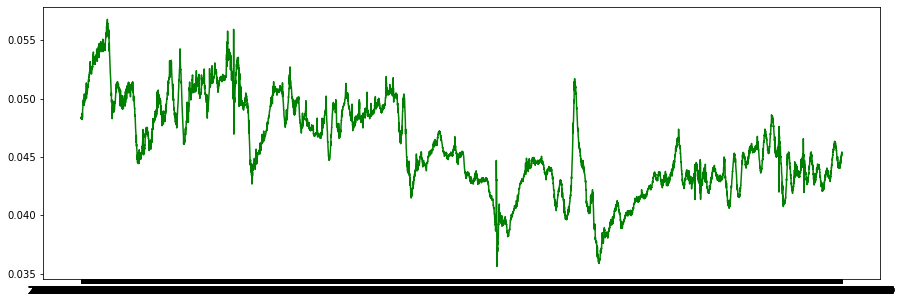

In [216]:
plt.figure(figsize(15, 5))
plt.plot(X.iloc[:10080,0], y.iloc[:10080,1], color='g')


<AxesSubplot:>

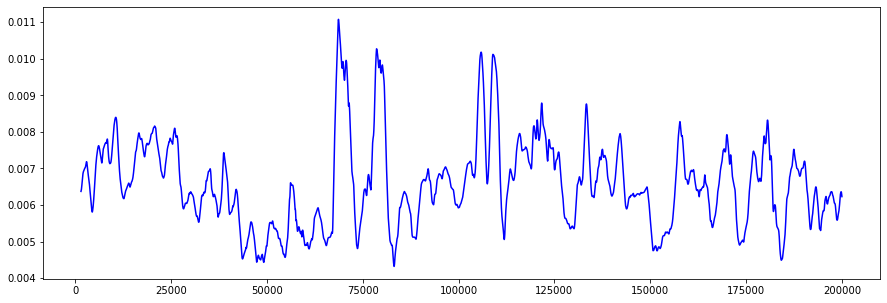

In [242]:
y.iloc[:199991,3].rolling(1440).mean().plot(color='b', label='Re')

In [189]:
X.iloc[:,0]

0         2016-08-18 00:09:00
1         2016-08-18 00:10:00
2         2016-08-18 00:11:00
3         2016-08-18 00:12:00
4         2016-08-18 00:13:00
                 ...         
199986    2017-01-03 21:15:00
199987    2017-01-03 21:16:00
199988    2017-01-03 21:17:00
199989    2017-01-03 21:18:00
199990    2017-01-03 21:19:00
Name: 0, Length: 199991, dtype: object

In [195]:
y.iloc[:,0]

9         0.001120
10        0.001122
11        0.001122
12        0.001120
13        0.001123
            ...   
199995    0.001514
199996    0.001514
199997    0.001516
199998    0.001516
199999    0.001516
Name: target1, Length: 199991, dtype: float64